# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# WEATHER_API URL: http://api.openweathermap.org/data/2.5/weather?appid=fc77fb30aacf15de2e57f6ad2f7b9786&units=metric&q=
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


#Lists for holding weather data
temp = []
humidity = []
max_temp = []
cloudiness = []
windspeed = []
country = []
date = []
city2 = []

#Lat (y) | Long (x) 
lat = []
lng = []

#for loop numbers for Record number and Set numbers
number = 1 
set_num = 1
units = "imperial"

#Loop through 500 cities for weather data
for city in cities[:500]:
    weather_url = f"{url}appid={weather_api_key}&units={units}&q=" + city
    weather_response = requests.get(weather_url)
    weather_json = weather_response.json()

    try:
        temp.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        max_temp.append(weather_json['main']['temp_max'])
        cloudiness.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        city2.append(city)

            

        print(f"Processing Record {number} of Set of {set_num} | {city}")
        number = number + 1
        if number > 50:
            number = 0 
            set_num = set_num + 1 
            
    except:
        print("City not found. Skipping...")

Processing Record 1 of Set of 1 | nemuro
Processing Record 2 of Set of 1 | tilichiki
Processing Record 3 of Set of 1 | mataura
Processing Record 4 of Set of 1 | codrington
Processing Record 5 of Set of 1 | santiago del estero
Processing Record 6 of Set of 1 | kohtla-nomme
Processing Record 7 of Set of 1 | hermanus
Processing Record 8 of Set of 1 | nouadhibou
Processing Record 9 of Set of 1 | bubaque
Processing Record 10 of Set of 1 | hualmay
Processing Record 11 of Set of 1 | ushuaia
Processing Record 12 of Set of 1 | castro
City not found. Skipping...
Processing Record 13 of Set of 1 | cape town
Processing Record 14 of Set of 1 | soderhamn
Processing Record 15 of Set of 1 | solnechnyy
Processing Record 16 of Set of 1 | ulladulla
Processing Record 17 of Set of 1 | victoria
Processing Record 18 of Set of 1 | nuuk
Processing Record 19 of Set of 1 | along
Processing Record 20 of Set of 1 | acapulco
Processing Record 21 of Set of 1 | goderich
Processing Record 22 of Set of 1 | nizwa
Proces

Processing Record 19 of Set of 4 | saldanha
Processing Record 20 of Set of 4 | kodiak
Processing Record 21 of Set of 4 | mormugao
Processing Record 22 of Set of 4 | poya
Processing Record 23 of Set of 4 | namibe
Processing Record 24 of Set of 4 | thompson
Processing Record 25 of Set of 4 | kavieng
Processing Record 26 of Set of 4 | east london
Processing Record 27 of Set of 4 | maple creek
City not found. Skipping...
Processing Record 28 of Set of 4 | jambi
Processing Record 29 of Set of 4 | marsa matruh
Processing Record 30 of Set of 4 | bengkulu
Processing Record 31 of Set of 4 | porbandar
City not found. Skipping...
City not found. Skipping...
Processing Record 32 of Set of 4 | severo-kurilsk
Processing Record 33 of Set of 4 | bodden town
Processing Record 34 of Set of 4 | cap-aux-meules
Processing Record 35 of Set of 4 | tateyama
Processing Record 36 of Set of 4 | sibu
City not found. Skipping...
Processing Record 37 of Set of 4 | songling
Processing Record 38 of Set of 4 | kachug


Processing Record 39 of Set of 7 | hasaki
Processing Record 40 of Set of 7 | samarai
City not found. Skipping...
Processing Record 41 of Set of 7 | vilyuysk
Processing Record 42 of Set of 7 | chifeng
Processing Record 43 of Set of 7 | tymovskoye
Processing Record 44 of Set of 7 | vardo
Processing Record 45 of Set of 7 | guhagar
City not found. Skipping...
Processing Record 46 of Set of 7 | saint-leu
Processing Record 47 of Set of 7 | burnie
Processing Record 48 of Set of 7 | gornopravdinsk
Processing Record 49 of Set of 7 | lazaro cardenas
Processing Record 50 of Set of 7 | severobaykalsk
Processing Record 0 of Set of 8 | lac-megantic
Processing Record 1 of Set of 8 | lingao
Processing Record 2 of Set of 8 | virginia beach
Processing Record 3 of Set of 8 | montegranaro
Processing Record 4 of Set of 8 | dosso
Processing Record 5 of Set of 8 | san quintin
Processing Record 6 of Set of 8 | selikhino
Processing Record 7 of Set of 8 | guapore
Processing Record 8 of Set of 8 | constitucion
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# create dataframe
weather_dict = {"City": city2,
                "Lat": lat,
                "Lng": lng,
                "Max Temp": max_temp,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Windspeed": windspeed,
                "Country": country,
                "Date": date,
                }
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,nemuro,43.3236,145.5750,57.47,86,100,25.48,JP,1628631012
1,tilichiki,60.4667,166.1000,59.81,54,88,4.14,RU,1628631035
2,mataura,-46.1927,168.8643,43.48,94,27,3.40,NZ,1628631553
3,codrington,-38.2667,141.9667,48.94,81,100,15.79,AU,1628631567
4,santiago del estero,-27.7951,-64.2615,57.81,41,0,5.73,AR,1628631568
...,...,...,...,...,...,...,...,...,...
446,garzon,2.1959,-75.6278,75.49,84,34,4.63,CO,1628631705
447,luderitz,-26.6481,15.1594,61.86,53,29,1.61,NA,1628631706
448,havoysund,70.9963,24.6622,63.48,83,100,8.16,NO,1628631706
449,macau,22.2006,113.5461,85.06,89,40,13.80,MO,1628631706


In [10]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,4.510000e+02
mean,20.830642,17.137352,68.108581,73.638581,52.813747,7.362239,1.628632e+09
std,34.733806,92.697397,14.233144,18.514624,38.858214,5.042834,2.038086e+02
min,-54.800000,-179.166700,34.930000,3.000000,0.000000,0.000000,1.628631e+09
25%,-10.302250,-63.930050,56.420000,65.000000,10.000000,3.500000,1.628632e+09
50%,27.976900,22.788200,68.110000,78.000000,59.000000,6.150000,1.628632e+09
75%,50.241650,101.177150,79.215000,87.000000,90.000000,10.270000,1.628632e+09
max,78.218600,179.316700,106.770000,100.000000,100.000000,31.070000,1.628632e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
## Did not need to do. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

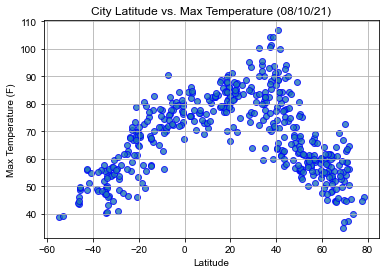

In [12]:
plt.scatter(weather_data["Lat"], 
            weather_data["Max Temp"],
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("City Latitude vs Max Temperature (F).png")

## Latitude vs. Humidity Plot

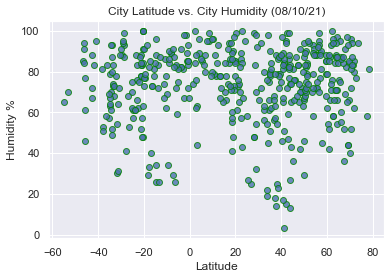

In [13]:
plt.scatter(weather_data["Lat"], 
            weather_data["Humidity"],
            edgecolor="green", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. City Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

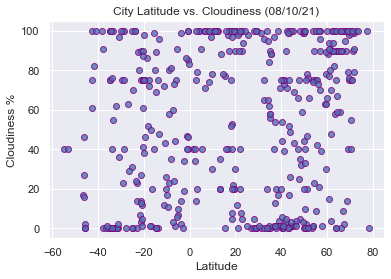

In [14]:
plt.scatter(weather_data["Lat"], 
            weather_data["Cloudiness"],
            edgecolor="purple", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

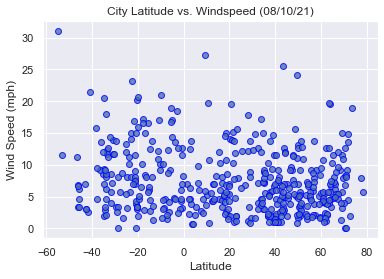

In [15]:
plt.scatter(weather_data["Lat"], 
            weather_data["Windspeed"],
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Windspeed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("City Latitude vs Wind Speed.png")

## Linear Regression

In [16]:
#Cities on the Equator will be included in the Southern Hemisphere data. 
northern_lat = weather_data[weather_data['Lat'] > 0]
southern_lat = weather_data[weather_data['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

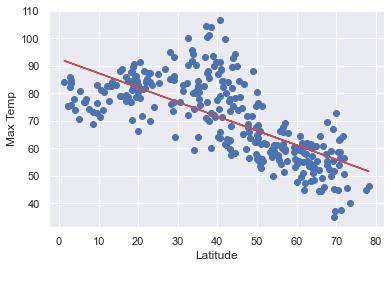

R-squared: 0.493496


In [17]:
x_values = northern_lat['Lat']
y_values = northern_lat['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

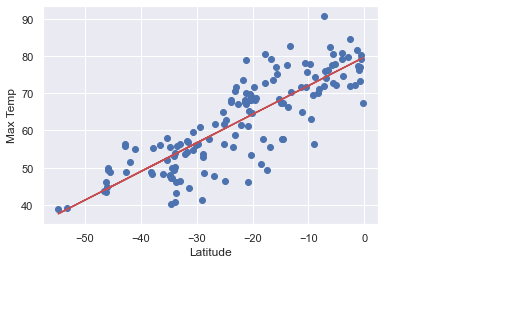

R-squared: 0.690364


In [18]:
x_values = southern_lat['Lat']
y_values = southern_lat['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

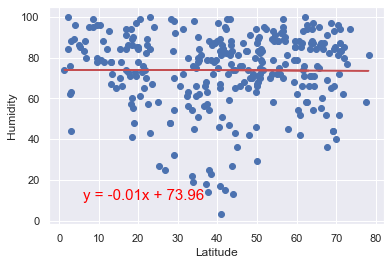

R-squared: 0.000035


In [19]:
x_values = northern_lat['Lat']
y_values = northern_lat['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

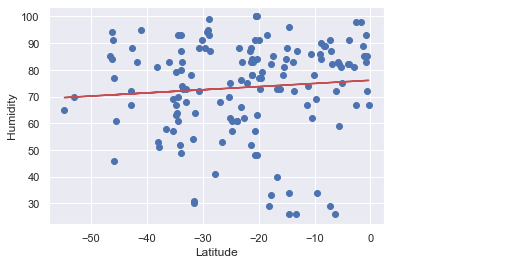

R-squared: 0.007471


In [20]:
x_values = southern_lat['Lat']
y_values = southern_lat['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

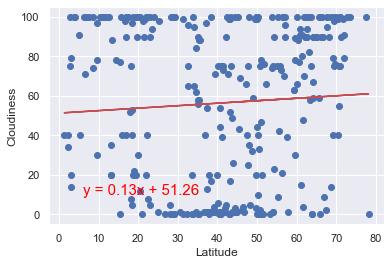

R-squared: 0.003820


In [21]:
x_values = northern_lat['Lat']
y_values = northern_lat['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

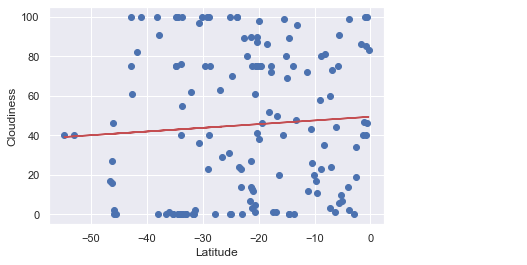

R-squared: 0.004381


In [22]:
x_values = southern_lat['Lat']
y_values = southern_lat['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

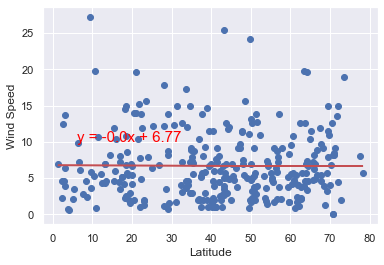

R-squared: 0.000030


In [23]:
x_values = northern_lat['Lat']
y_values = northern_lat['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

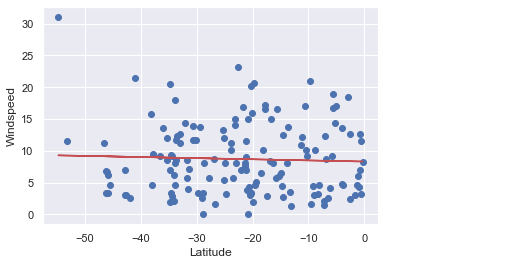

R-squared: 0.001710


In [24]:
x_values = southern_lat['Lat']
y_values = southern_lat['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.show()
print(f"R-squared: {rvalue**2:.6f}")